
# Ciência dos Dados - PROJETO 1

## David Fogelman


## Objetivo
O meu objetivo do projeto é definir a relção da escolaridade com o acesso da internet e a renda

## Como a renda e o grau de escolaridade influenciam no acesso á internet nas regiões Brasileiras para uma população abaixo de 72 anos?

https://tecnologia.uol.com.br/noticias/redacao/2015/04/29/ibge-renda-e-escolaridade-tem-relacao-direta-com-acesso-a-internet.htm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline



print('Esperamos trabalhar no diretório')
print(os.getcwd())
print("ok")

Esperamos trabalhar no diretório
E:\Semestre 2\Ciência dos Dados\Projetos\InsperEng-CD
ok


### Importando os dados da Tabela

In [3]:
dados = pd.read_csv('Dados_selecionados_2015.csv')
dados2014 = pd.read_csv('Dados_selecionados_2014.csv')
dados2013 = pd.read_csv('Dados_selecionados_2013.csv')


### Retirando os dados nulos

#### Para 2015

In [4]:
dados_not_null = dados[pd.notnull(dados.UF)&pd.notnull(dados.V8005)&pd.notnull(dados.V06111)&pd.notnull(dados.V4750)&pd.notnull(dados.V4745)]
dados_not_null = dados_not_null[dados.V4750!=999999999999] # tirando rendas inválidas

dados_not_null = dados_not_null[dados.V4745!=8] # tirando ensinos inderteminados
# dados_not_null = dados_not_null[dados.UF==35] # tirando outros estados além de SP
dados_not_null = dados_not_null[dados.V8005<73] # retirando moradores maiores que 72 anos
dados = dados_not_null

dados.V06111 = dados.V06111.astype('category')
dados.V06111.cat.categories = (['Sim', 'Não'])
dados.V4745 = dados.V4745.astype('category')

dados.V4745.cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo' ])


E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Para 2014

In [5]:
dados2014_not_null = dados2014[pd.notnull(dados2014.UF)&pd.notnull(dados2014.V8005)&pd.notnull(dados2014.V06111)&pd.notnull(dados2014.V4750)&pd.notnull(dados2014.V4745)]
dados2014_not_null = dados2014_not_null[dados2014.V4750!=999999999999] # tirando rendas inválidas

dados2014_not_null = dados2014_not_null[dados2014.V4745!=8] # tirando ensinos inderteminados
# dados2014_not_null = dados2014_not_null[dados2014.UF==35] # tirando outros estados além de SP
dados2014_not_null = dados2014_not_null[dados2014.V8005<73] # retirando moradores maiores que 72 anos
dados2014 = dados2014_not_null

dados2014.V06111 = dados2014.V06111.astype('category')
dados2014.V06111.cat.categories = (['Sim', 'Não'])
dados2014.V4745 = dados2014.V4745.astype('category')

dados2014.V4745.cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo' ])


E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Para 2013

In [6]:
dados2013_not_null = dados2013[pd.notnull(dados2013.UF)&pd.notnull(dados2013.V8005)&pd.notnull(dados2013.V06111)&pd.notnull(dados2013.V4750)&pd.notnull(dados2013.V4745)]
dados2013_not_null = dados2013_not_null[dados2013.V4750!=999999999999] # tirando rendas inválidas

dados2013_not_null = dados2013_not_null[dados2013.V4745!=8] # tirando ensinos inderteminados
# dados2013_not_null = dados2013_not_null[dados2013.UF==35] # tirando outros estados além de SP
dados2013_not_null = dados2013_not_null[dados2013.V8005<73] # retirando moradores maiores que 72 anos
dados2013 = dados2013_not_null

dados2013.V06111 = dados2013.V06111.astype('category')
dados2013.V06111.cat.categories = (['Sim', 'Não'])
dados2013.V4745 = dados2013.V4745.astype('category')

dados2013.V4745.cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo' ])


E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Separando os estados por regiões


In [7]:

# 2015
dados.UF =dados.UF.astype('category')
dados.loc[(dados.UF == 11)|(dados.UF ==12)|(dados.UF ==13)|(dados.UF ==14)|(dados.UF ==15)|(dados.UF ==16)|(dados.UF ==17),'REGIAO'] = 'Norte'
dados.loc[(dados.UF == 21)|(dados.UF ==22)|(dados.UF ==23)|(dados.UF ==24)|(dados.UF ==25)|(dados.UF ==26)|(dados.UF ==27)|(dados.UF ==28)|(dados.UF ==29),'REGIAO'] = 'Nordeste'
dados.loc[(dados.UF == 51)|(dados.UF ==50)|(dados.UF ==53)|(dados.UF ==52),'REGIAO'] = 'Centro Oeste'
dados.loc[(dados.UF == 31)|(dados.UF ==32)|(dados.UF ==33)|(dados.UF ==35),'REGIAO'] = 'Sudeste'
dados.loc[(dados.UF == 41)|(dados.UF ==42)|(dados.UF ==43),'REGIAO'] = 'Sul'

dados_norte = dados[dados.REGIAO == "Norte" ]
dados_nordeste = dados[dados.REGIAO == "Nordeste" ]
dados_centro_oeste = dados[dados.REGIAO == "Centro Oeste" ]
dados_sudeste = dados[dados.REGIAO == "Sudeste" ]
dados_sul = dados[dados.REGIAO == "Sul" ]
# 2014
dados2014.UF =dados2014.UF.astype('category')
dados2014.loc[(dados2014.UF == 11)|(dados2014.UF ==12)|(dados2014.UF ==13)|(dados2014.UF ==14)|(dados2014.UF ==15)|(dados2014.UF ==16)|(dados2014.UF ==17),'REGIAO'] = 'Norte'
dados2014.loc[(dados2014.UF == 21)|(dados2014.UF ==22)|(dados2014.UF ==23)|(dados2014.UF ==24)|(dados2014.UF ==25)|(dados2014.UF ==26)|(dados2014.UF ==27)|(dados2014.UF ==28)|(dados2014.UF ==29),'REGIAO'] = 'Nordeste'
dados2014.loc[(dados2014.UF == 51)|(dados2014.UF ==50)|(dados2014.UF ==53)|(dados2014.UF ==52),'REGIAO'] = 'Centro Oeste'
dados2014.loc[(dados2014.UF == 31)|(dados2014.UF ==32)|(dados2014.UF ==33)|(dados2014.UF ==35),'REGIAO'] = 'Sudeste'
dados2014.loc[(dados2014.UF == 41)|(dados2014.UF ==42)|(dados2014.UF ==43),'REGIAO'] = 'Sul'

dados2014_norte = dados2014[dados2014.REGIAO == "Norte" ]
dados2014_nordeste = dados2014[dados2014.REGIAO == "Nordeste" ]
dados2014_centro_oeste = dados2014[dados2014.REGIAO == "Centro Oeste" ]
dados2014_sudeste = dados2014[dados2014.REGIAO == "Sudeste" ]
dados2014_sul = dados2014[dados2014.REGIAO == "Sul" ]
# 2013
dados2013.UF =dados2013.UF.astype('category')
dados2013.loc[(dados2013.UF == 11)|(dados2013.UF ==12)|(dados2013.UF ==13)|(dados2013.UF ==14)|(dados2013.UF ==15)|(dados2013.UF ==16)|(dados2013.UF ==17),'REGIAO'] = 'Norte'
dados2013.loc[(dados2013.UF == 21)|(dados2013.UF ==22)|(dados2013.UF ==23)|(dados2013.UF ==24)|(dados2013.UF ==25)|(dados2013.UF ==26)|(dados2013.UF ==27)|(dados2013.UF ==28)|(dados2013.UF ==29),'REGIAO'] = 'Nordeste'
dados2013.loc[(dados2013.UF == 51)|(dados2013.UF ==50)|(dados2013.UF ==53)|(dados2013.UF ==52),'REGIAO'] = 'Centro Oeste'
dados2013.loc[(dados2013.UF == 31)|(dados2013.UF ==32)|(dados2013.UF ==33)|(dados2013.UF ==35),'REGIAO'] = 'Sudeste'
dados2013.loc[(dados2013.UF == 41)|(dados2013.UF ==42)|(dados2013.UF ==43),'REGIAO'] = 'Sul'

dados2013_norte = dados2013[dados2013.REGIAO == "Norte" ]
dados2013_nordeste = dados2013[dados2013.REGIAO == "Nordeste" ]
dados2013_centro_oeste = dados2013[dados2013.REGIAO == "Centro Oeste" ]
dados2013_sudeste = dados2013[dados2013.REGIAO == "Sudeste" ]
dados2013_sul = dados2013[dados2013.REGIAO == "Sul" ]

# Analisando a relação entre os niveis educacionais e o acesso a internet no Brasil

[]

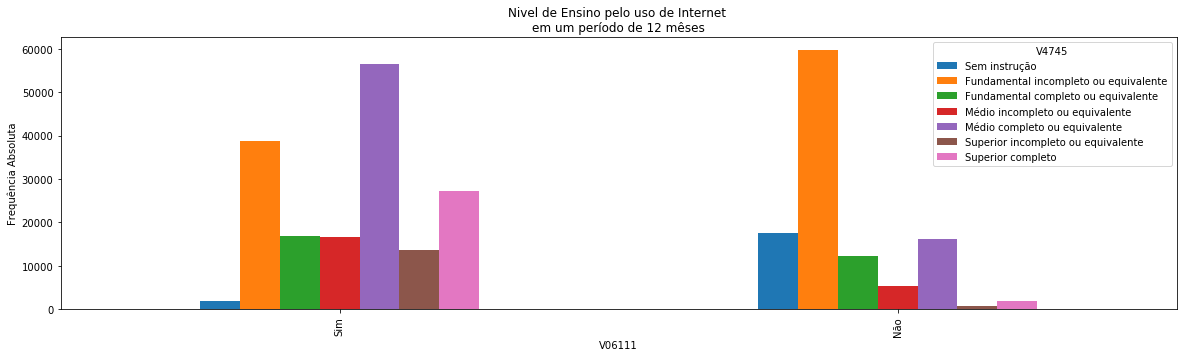

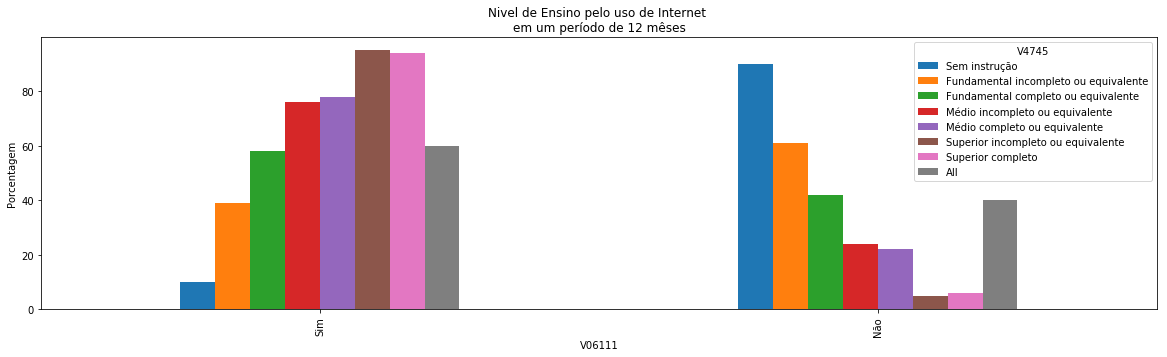

In [8]:
ct1 = (pd.crosstab(dados.V06111, dados.V4745))
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Frequência Absoluta')
plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")
plt.plot()


ct1 = (pd.crosstab(dados.V06111, dados.V4745, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Porcentagem')
plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")
plt.plot()

##### A partir desses gráficos acima é possivel perceber que quanto maior o nivel de instrução o acesso á internet aumenta

# Analisando a relação entre as faixas de renda (separadas em salários mínimos) e o acesso a internet no Brasil

[]

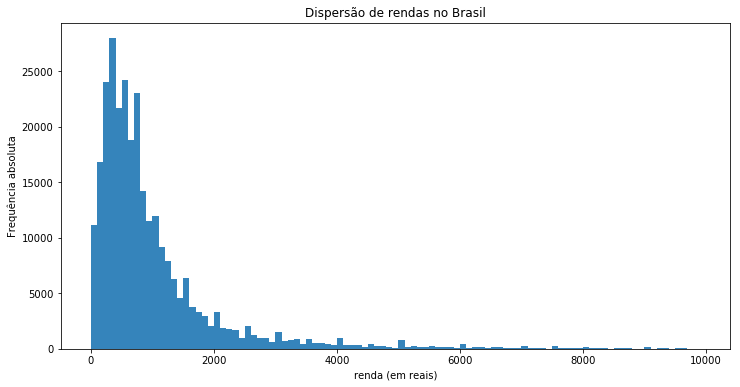

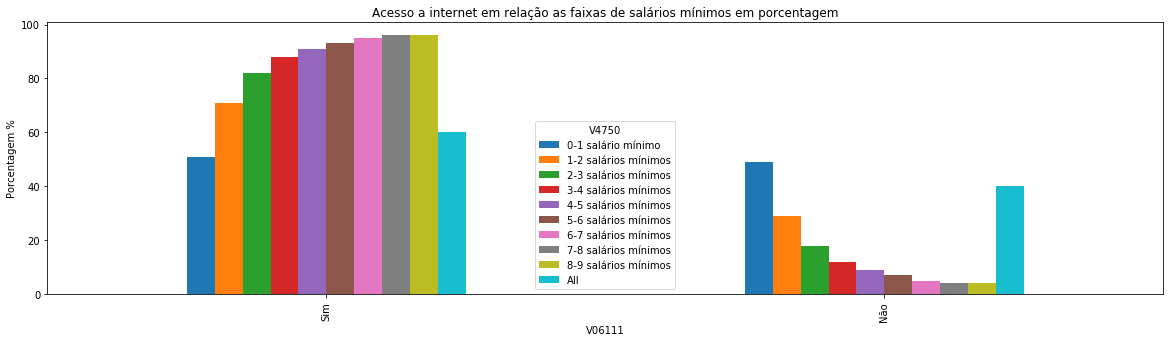

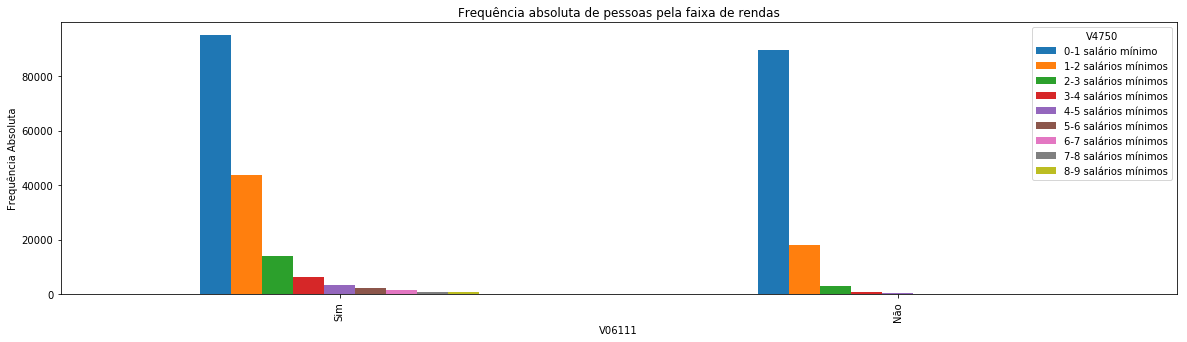

In [9]:


faixa = range(0,9370,937) # em salários mínimos
RENDA_cat = pd.cut(dados.V4750, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100

RENDA_cat = RENDA_cat.astype('category')
RENDA_cat = RENDA_cat[pd.notnull(RENDA_cat)]
RENDA_cat.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])
# ----------------------


plot = dados.V4750[dados.V4750<10000].plot.hist(bins = range(0,9999,100),title='Dispersão de rendas no Brasil', figsize=(12, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
plt.plot()


ct1 = (pd.crosstab(dados.V06111, RENDA_cat, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Porcentagem %')
plt.title("Acesso a internet em relação as faixas de salários mínimos em porcentagem")
plt.plot()

ct1 = pd.crosstab(dados.V06111, RENDA_cat)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Frequência Absoluta')
plt.title("Frequência absoluta de pessoas pela faixa de rendas")
plt.plot()



# # print(RENDA_cat)
# plt.title("Porcentagem de pessoas pela faixa de rendas")
# ct1 = pd.crosstab(dados.V06111,RENDA_cat)
# ct1.plot(kind='pie',figsize=(20, 25),subplots=True,layout=(3, 3),autopct="%.2f")
# # plt.ylabel('Frequência Absoluta')
# plt.plot()

In [10]:
pd.crosstab([dados.V06111, dados.V4745],RENDA_cat,  margins=True)

V4750                                         0-1 salário mínimo  \
V06111 V4745                                                       
Sim    Sem instrução                                        1329   
       Fundamental incompleto ou equivalente               29198   
       Fundamental completo ou equivalente                 11500   
       Médio incompleto ou equivalente                     11899   
       Médio completo ou equivalente                       31572   
       Superior incompleto ou equivalente                   5265   
       Superior completo                                    4221   
Não    Sem instrução                                       15040   
       Fundamental incompleto ou equivalente               48499   
       Fundamental completo ou equivalente                  9066   
       Médio incompleto ou equivalente                      4435   
       Médio completo ou equivalente                       11370   
       Superior incompleto ou equivalente                    470   
       Superior completo                                     771   
All                                                       184635   

V4750                                         1-2 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                           401   
       Fundamental incompleto ou equivalente                  6867   
       Fundamental completo ou equivalente                    3867   
       Médio incompleto ou equivalente                        3312   
       Médio completo ou equivalente                         16933   
       Superior incompleto ou equivalente                     4570   
       Superior completo                                      7652   
Não    Sem instrução                                          2097   
       Fundamental incompleto ou equivalente                  9004   
       Fundamental completo ou equivalente                    2321   
       Médio incompleto ou equivalente                         640   
       Médio completo ou equivalente                          3389   
       Superior incompleto ou equivalente                      192   
       Superior completo                                       554   
All                                                          61799   

V4750                                         2-3 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                            93   
       Fundamental incompleto ou equivalente                  1336   
       Fundamental completo ou equivalente                     781   
       Médio incompleto ou equivalente                         645   
       Médio completo ou equivalente                          4298   
       Superior incompleto ou equivalente                     1784   
       Superior completo                                      5080   
Não    Sem instrução                                           205   
       Fundamental incompleto ou equivalente                  1212   
       Fundamental completo ou equivalente                     420   
       Médio incompleto ou equivalente                         115   
       Médio completo ou equivalente                           762   
       Superior incompleto ou equivalente                       41   
       Superior completo                                       219   
All                                                          16991   

V4750                                         3-4 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                            26   
       Fundamental incompleto ou equivalente                   423   
       Fundamental completo ou equivalente                     223   
       Médio incompleto ou equivalente                         219   
       Médio completo ou equivalente     

## Analise de escolaridade pelo acesso da internet nas regiôes do Brasil

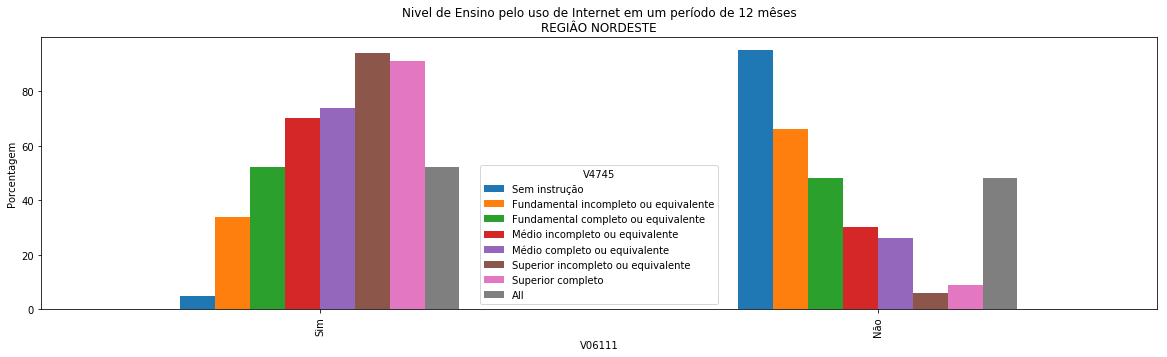

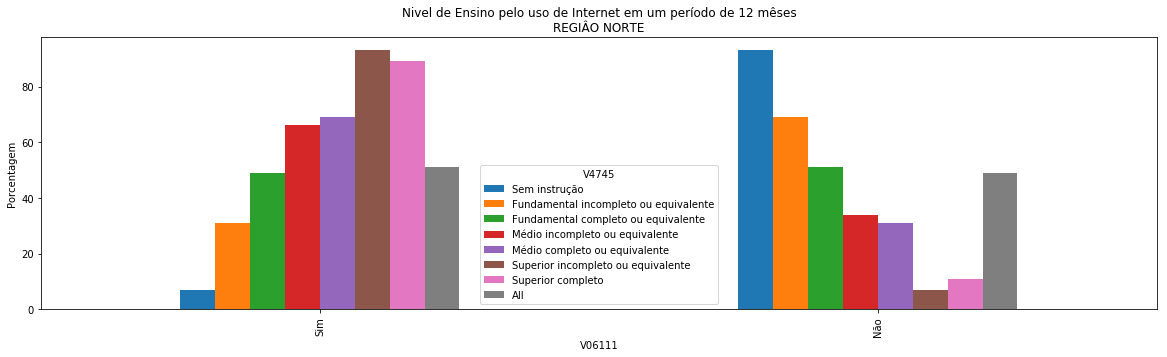

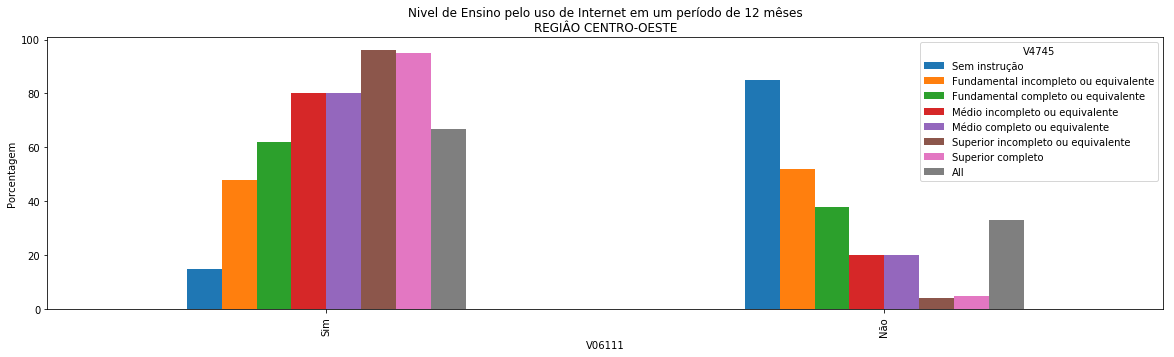

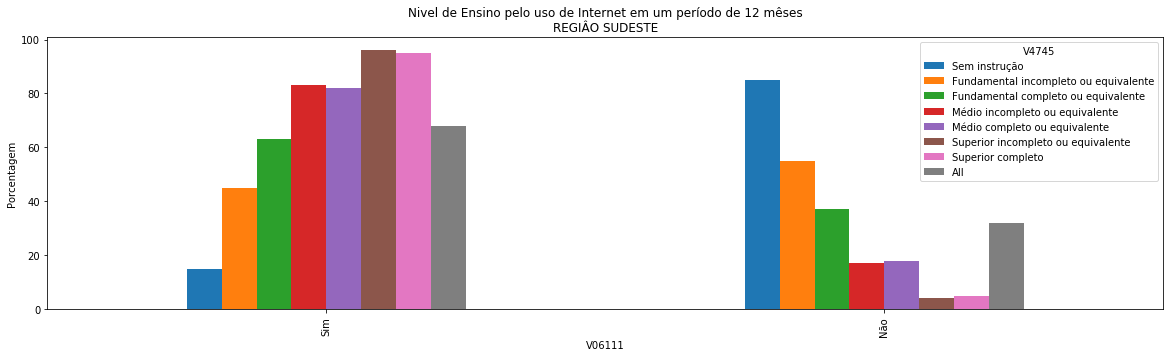

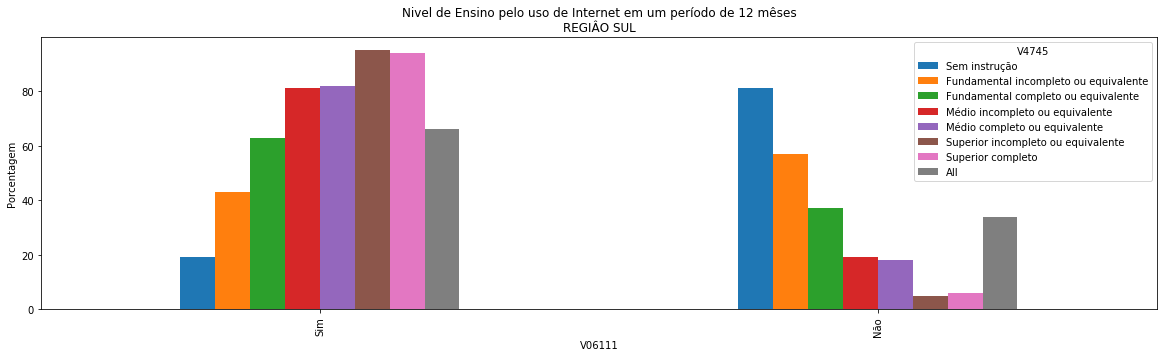

In [11]:

ct1 = (pd.crosstab(dados_nordeste.V06111, dados_nordeste.V4745, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Porcentagem')
plt.title("Nivel de Ensino pelo uso de Internet em um período de 12 mêses\nREGIÂO NORDESTE")

ct1 = (pd.crosstab(dados_norte.V06111, dados_norte.V4745, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Porcentagem')
plt.title("Nivel de Ensino pelo uso de Internet em um período de 12 mêses\nREGIÂO NORTE")

ct1 = (pd.crosstab(dados_centro_oeste.V06111, dados_centro_oeste.V4745, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Porcentagem')
plt.title("Nivel de Ensino pelo uso de Internet em um período de 12 mêses\nREGIÂO CENTRO-OESTE")

ct1 = (pd.crosstab(dados_sudeste.V06111, dados_sudeste.V4745, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Porcentagem')
plt.title("Nivel de Ensino pelo uso de Internet em um período de 12 mêses\nREGIÂO SUDESTE")

ct1 = (pd.crosstab(dados_sul.V06111, dados_sul.V4745, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Porcentagem')
plt.title("Nivel de Ensino pelo uso de Internet em um período de 12 mêses\nREGIÂO SUL")



##### Acima é possivel perceber que o acesso da internet pela educação varia em cada região, sendo que a região nordeste possui a menor porcentagem de sim 
##### Em contrapartida a região sudeste tem a maior concentração de respostas no eixo "sim"
##### Em suma, percebe-se que apesar das diferenças entre as regiões, a ligação entre educação e acesso à internet se mantèm para todas as situações acima

## Analise de renda (faixas de salários mínimos) pelo acesso da internet nas regiôes do Brasil

#### Esta separação foi feita para analisar se a relação se mantém para todas as regiões

[]

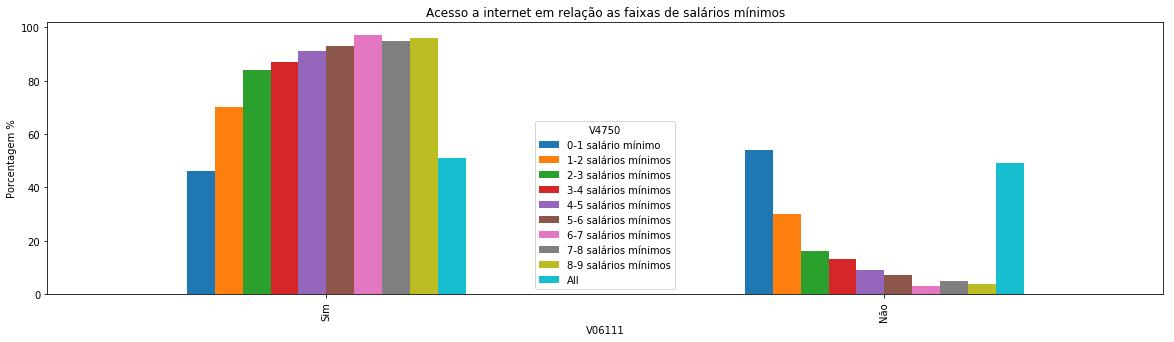

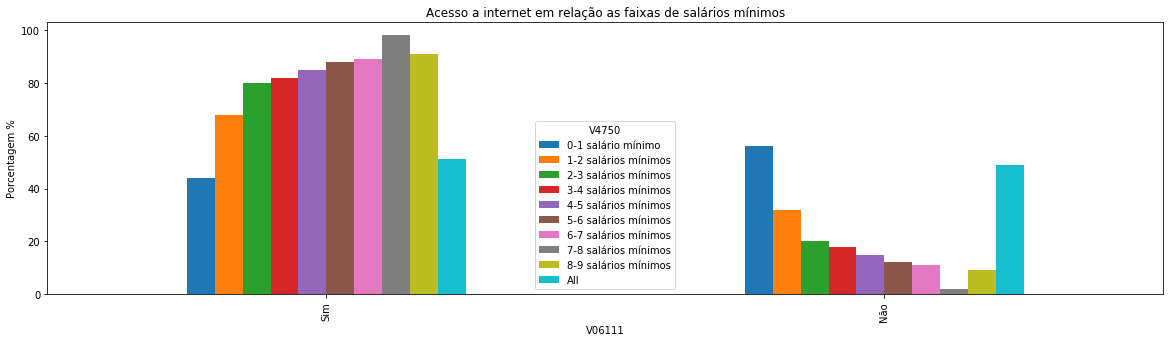

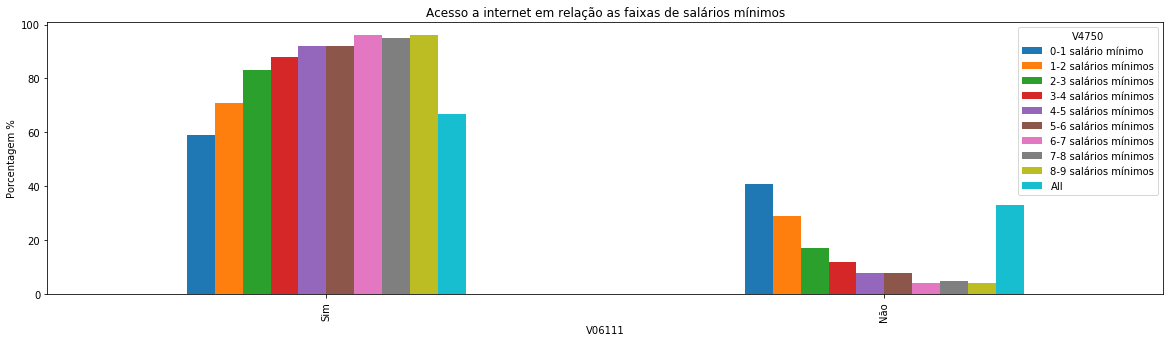

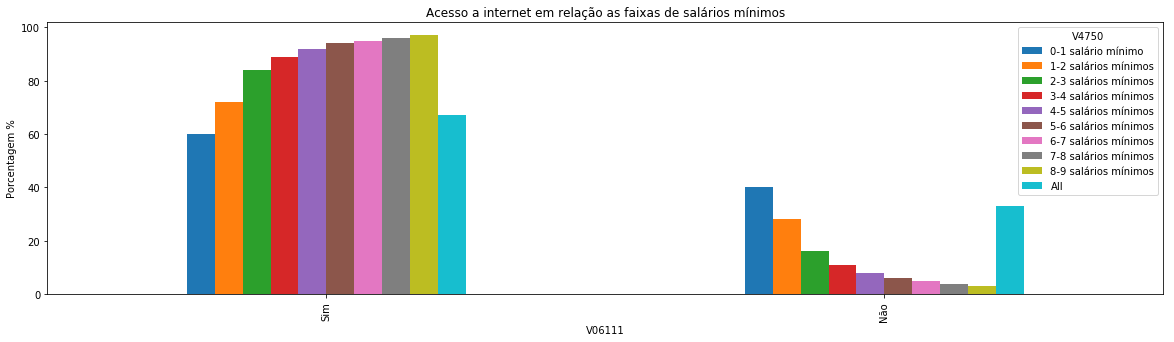

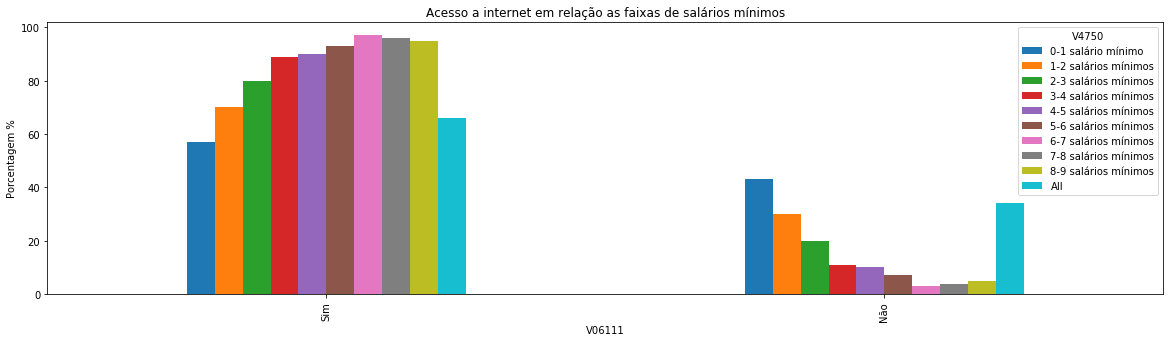

In [12]:
faixa = range(0,9370,937) # em salários mínimos
RENDA_SUL = pd.cut(dados_sul.V4750, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100
RENDA_SUL = RENDA_SUL.astype('category')
RENDA_SUL = RENDA_SUL[pd.notnull(RENDA_SUL)]
RENDA_SUL.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])

RENDA_SUDESTE = pd.cut(dados_sudeste.V4750, bins=faixa)
RENDA_SUDESTE.value_counts(sort=False, normalize=True)*100
RENDA_SUDESTE = RENDA_SUDESTE.astype('category')
RENDA_SUDESTE = RENDA_SUDESTE[pd.notnull(RENDA_SUDESTE)]
RENDA_SUDESTE.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])


RENDA_CENTROOESTE = pd.cut(dados_centro_oeste.V4750, bins=faixa)
RENDA_CENTROOESTE.value_counts(sort=False, normalize=True)*100
RENDA_CENTROOESTE = RENDA_CENTROOESTE.astype('category')
RENDA_CENTROOESTE = RENDA_CENTROOESTE[pd.notnull(RENDA_CENTROOESTE)]
RENDA_CENTROOESTE.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])


RENDA_NORDESTE = pd.cut(dados_nordeste.V4750, bins=faixa)
RENDA_NORDESTE.value_counts(sort=False, normalize=True)*100
RENDA_NORDESTE = RENDA_NORDESTE.astype('category')
RENDA_NORDESTE = RENDA_NORDESTE[pd.notnull(RENDA_NORDESTE)]
RENDA_NORDESTE.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])


RENDA_NORTE = pd.cut(dados_norte.V4750, bins=faixa)
RENDA_NORTE.value_counts(sort=False, normalize=True)*100
RENDA_NORTE = RENDA_NORTE.astype('category')
RENDA_NORTE = RENDA_NORTE[pd.notnull(RENDA_NORTE)]
RENDA_NORTE.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])



ct1 = (pd.crosstab(dados_nordeste.V06111, RENDA_NORDESTE, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Porcentagem %')
plt.title("Acesso a internet em relação as faixas de salários mínimos")
plt.plot()
ct1 = (pd.crosstab(dados_norte.V06111, RENDA_NORTE, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Porcentagem %')
plt.title("Acesso a internet em relação as faixas de salários mínimos")
plt.plot()
ct1 = (pd.crosstab(dados_centro_oeste.V06111, RENDA_CENTROOESTE, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Porcentagem %')
plt.title("Acesso a internet em relação as faixas de salários mínimos")
plt.plot()
ct1 = (pd.crosstab(dados_sudeste.V06111, RENDA_SUDESTE, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Porcentagem %')
plt.title("Acesso a internet em relação as faixas de salários mínimos")
plt.plot()
ct1 = (pd.crosstab(dados_sul.V06111, RENDA_SUL, margins=True, normalize='columns')*100).round(decimals=0)
ct1.plot(kind='bar',figsize=(20, 5))
plt.ylabel('Porcentagem %')
plt.title("Acesso a internet em relação as faixas de salários mínimos")
plt.plot()


##### Acima é possivel perceber que o acesso da internet pelas faixas de renda está variando em cada região

##### Do mesmo modo da educação, quanto mais elevada a renda, maior será  o acesso a internet

# Variação do acesso á internet pelo tempo

In [13]:
s15 = dados.V06111.value_counts(True)

In [14]:
s14 = dados2014.V06111.value_counts(True)

In [15]:
s13 = dados2013.V06111.value_counts(True)

In [16]:
s13.name = "2013"
s14.name = "2014"
s15.name = "2015"

In [17]:
s13

Sim    0.508313
Não    0.491687
Name: 2013, dtype: float64

In [18]:
df = pd.DataFrame([s13, s14, s15])
df.T

,2013,2014,2015
Sim,0.508313,0.56826,0.602097
Não,0.491687,0.43174,0.397903


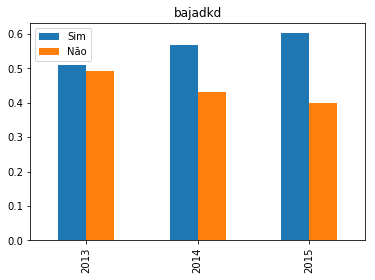

In [19]:
# evc = df.value_counts().reindex(['Analfabeto','1o. Grau', '2o. Grau', 'Graduacao', 'Pos-Graduacao'])
df.plot(kind='bar', title = "Variação do acesso á internet no período de 2013 à 2015 ",  legend=True)

### Pelo gráfico acima é possivel perceber que houve um aumento no acesso durante os anos